<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Identify missing values in critical columns
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values in critical columns:")
print(missing_values)

# Strategy to fill or drop missing values
# For this example, we'll fill missing values in 'Employment' and 'RemoteWork' with the most frequent value
# and drop rows with missing values in 'JobSat' if the percentage of missing values is below a threshold

# Fill missing values in 'Employment' and 'RemoteWork' with the most frequent value
most_frequent_employment = df['Employment'].mode()[0]
most_frequent_remote_work = df['RemoteWork'].mode()[0]

df['Employment'].fillna(most_frequent_employment, inplace=True)
df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)

# Drop rows with missing values in 'JobSat' if the percentage of missing values is below a threshold (e.g., 5%)
missing_job_sat_percentage = df['JobSat'].isnull().mean() * 100
if missing_job_sat_percentage < 5:
    df.dropna(subset=['JobSat'], inplace=True)
else:
    # If the percentage is higher, you might want to fill missing values with the most frequent value or another strategy
    most_frequent_job_sat = df['JobSat'].mode()[0]
    df['JobSat'].fillna(most_frequent_job_sat, inplace=True)

# Display the first few rows of the dataframe to verify the changes
print(df[['Employment', 'JobSat', 'RemoteWork']].head())

Missing values in critical columns:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
            Employment  JobSat                            RemoteWork
0  Employed, full-time     8.0                                Remote
1  Employed, full-time     8.0                                Remote
2  Employed, full-time     8.0                                Remote
3   Student, full-time     8.0  Hybrid (some remote, some in-person)
4   Student, full-time     8.0  Hybrid (some remote, some in-person)


/tmp/ipykernel_2211/3818041634.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_employment, inplace=True)
/tmp/ipykernel_2211/3818041634.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_2211/2812545964.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


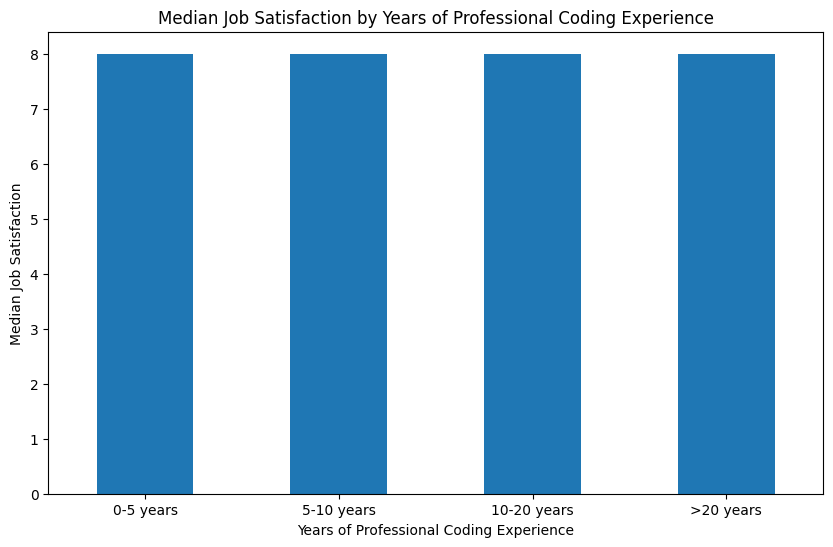

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to convert YearsCodePro to numeric values
def convert_years_code_pro(years):
    if years == 'Less than 1 year':
        return 0.5
    elif years == 'More than 50 years':
        return 51
    else:
        try:
            return float(years)
        except ValueError:
            return None

# Apply the conversion function to the YearsCodePro column
df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years_code_pro)

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodeProNumeric'], bins=bins, labels=labels, right=False)

# Calculate the median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
median_job_sat.plot(kind='bar')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


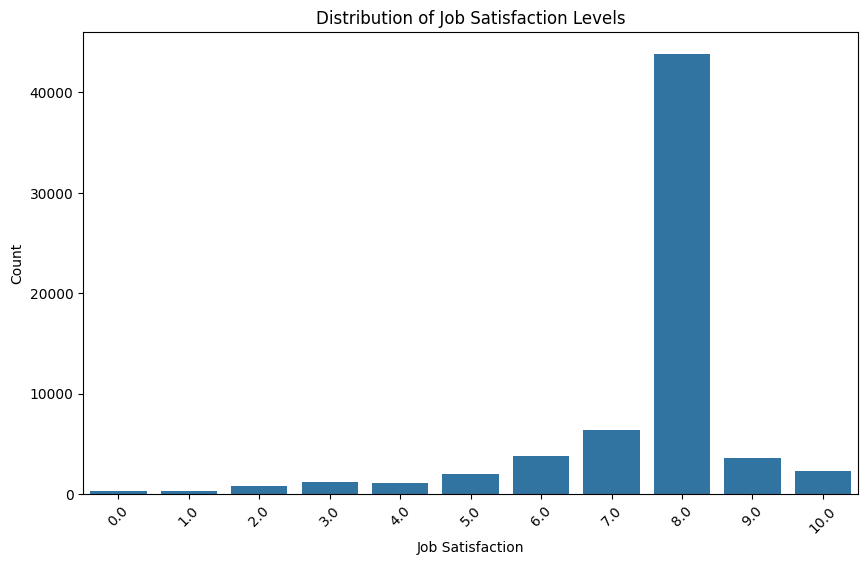

In [5]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the JobSat column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat')
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


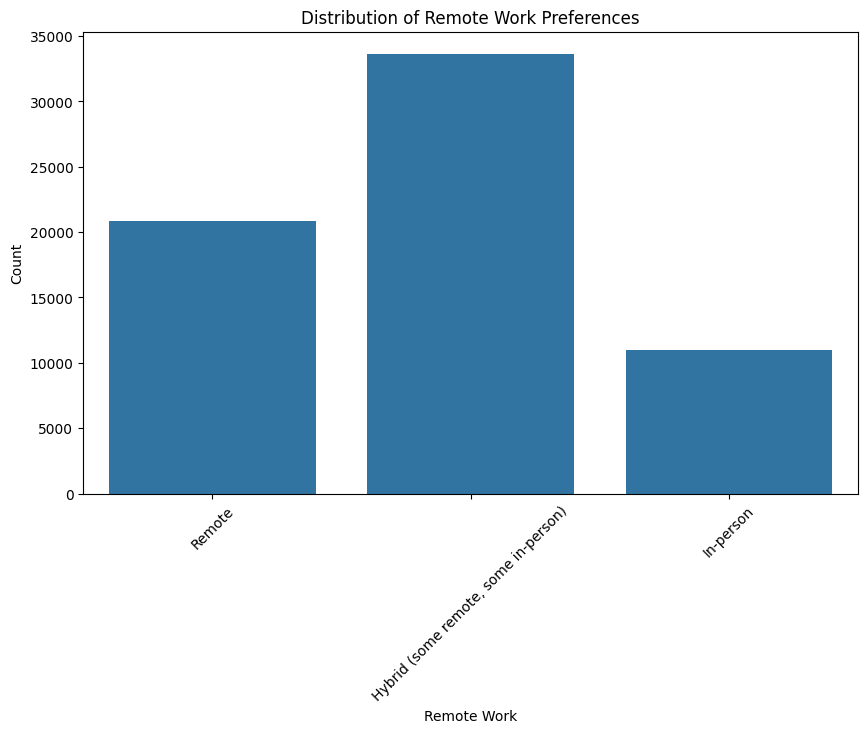

Cross-tabulation of Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-ti

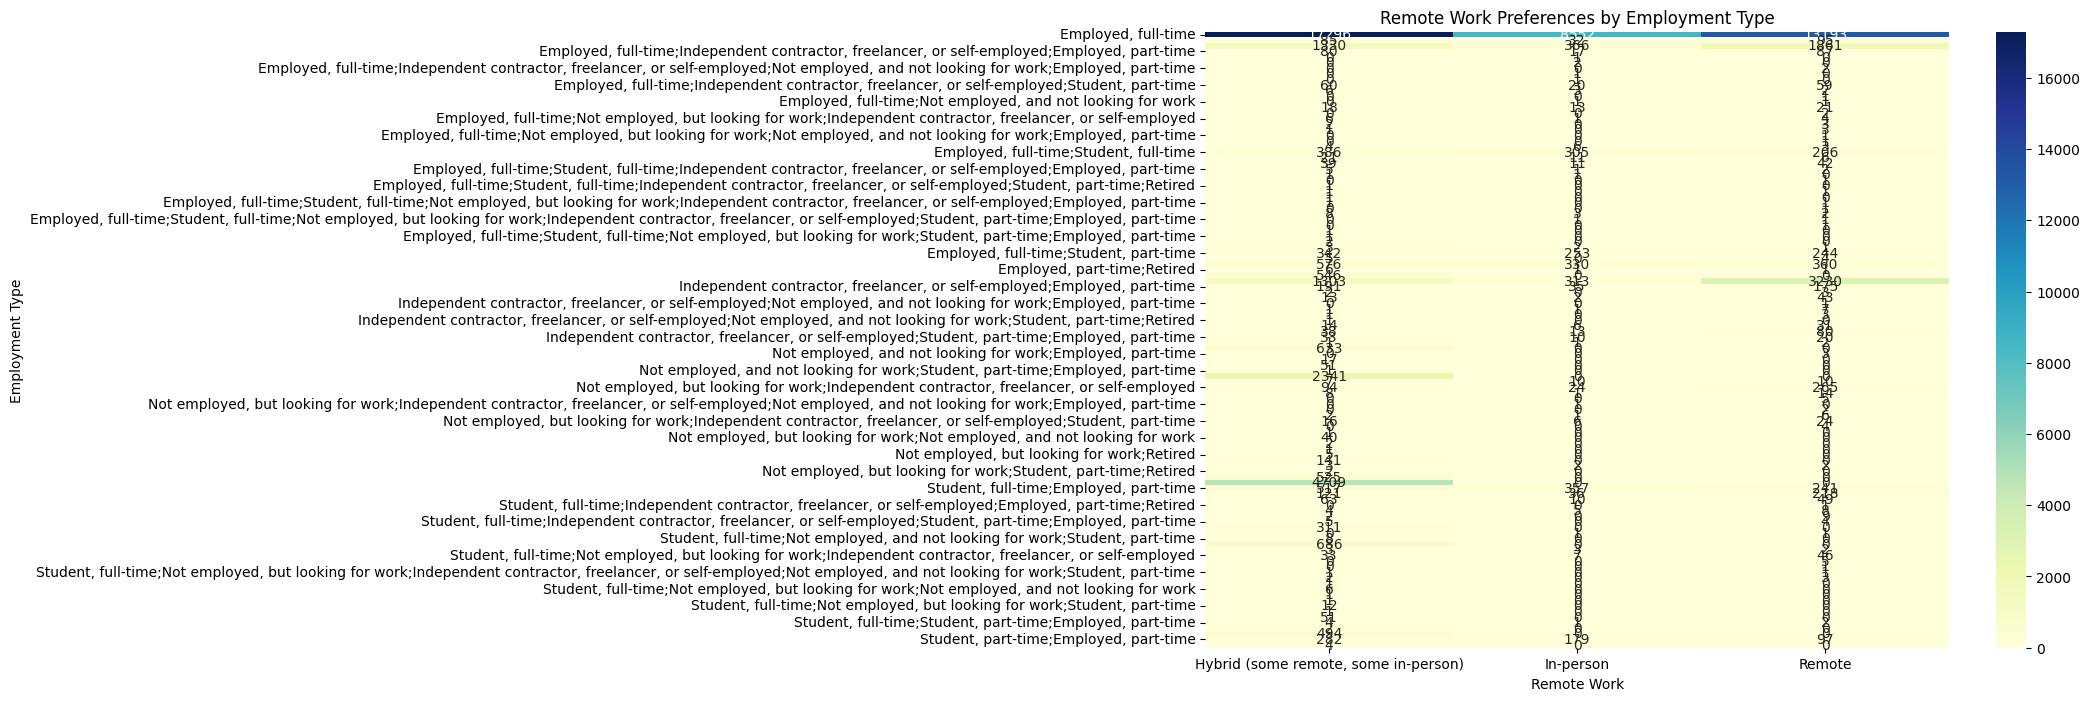

In [6]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the RemoteWork column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulate remote work preferences by employment type and job roles
remote_work_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])

# Display the cross-tabulation
print("Cross-tabulation of Remote Work Preferences by Employment Type:")
print(remote_work_crosstab)

# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work')
plt.ylabel('Employment Type')
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_2211/1483554229.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')


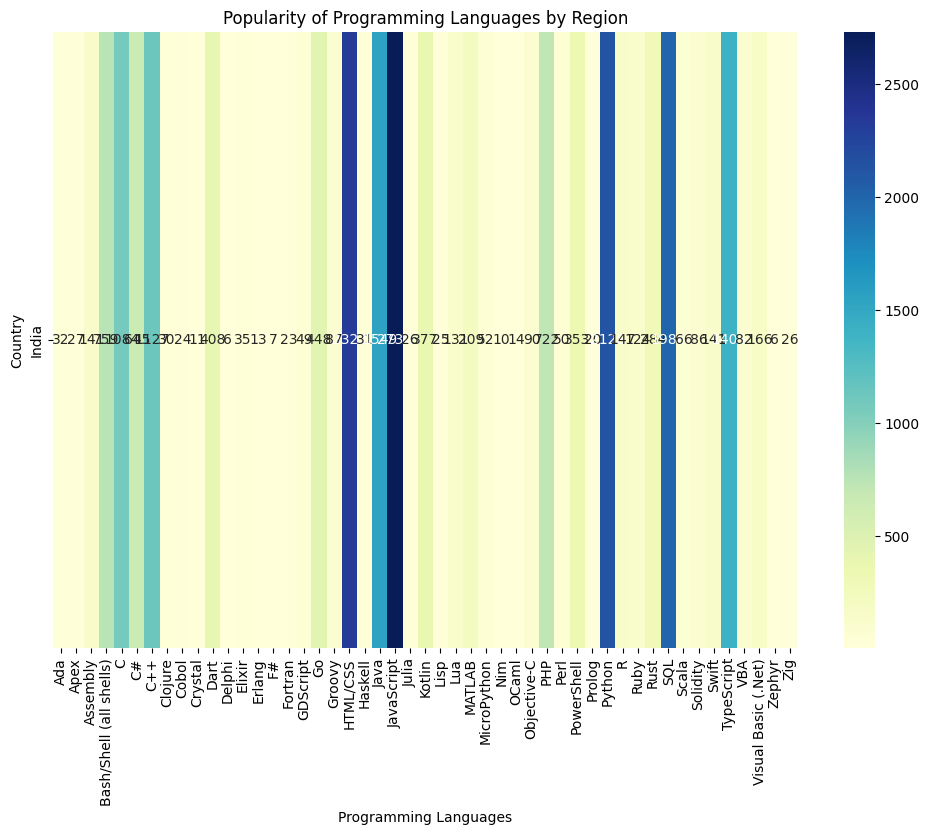

In [7]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data by country or region (e.g., 'United States', 'India')
regions = ['United States', 'India']  # Add more regions as needed
df_filtered = df[df['Country'].isin(regions)]

# Split the LanguageHaveWorkedWith column into individual languages
df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')

# Explode the Languages column to have one language per row
df_exploded = df_filtered.explode('Languages')

# Group by Country and Languages to get the count of each language in each region
language_counts = df_exploded.groupby(['Country', 'Languages']).size().reset_index(name='Count')

# Pivot the data to have languages as columns and countries as rows
language_pivot = language_counts.pivot(index='Country', columns='Languages', values='Count').fillna(0)

# Visualize the top programming languages by region with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(language_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Popularity of Programming Languages by Region')
plt.xlabel('Programming Languages')
plt.ylabel('Country')
plt.show()


/tmp/ipykernel_2211/3681428149.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';').fillna('')
/tmp/ipykernel_2211/3681428149.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


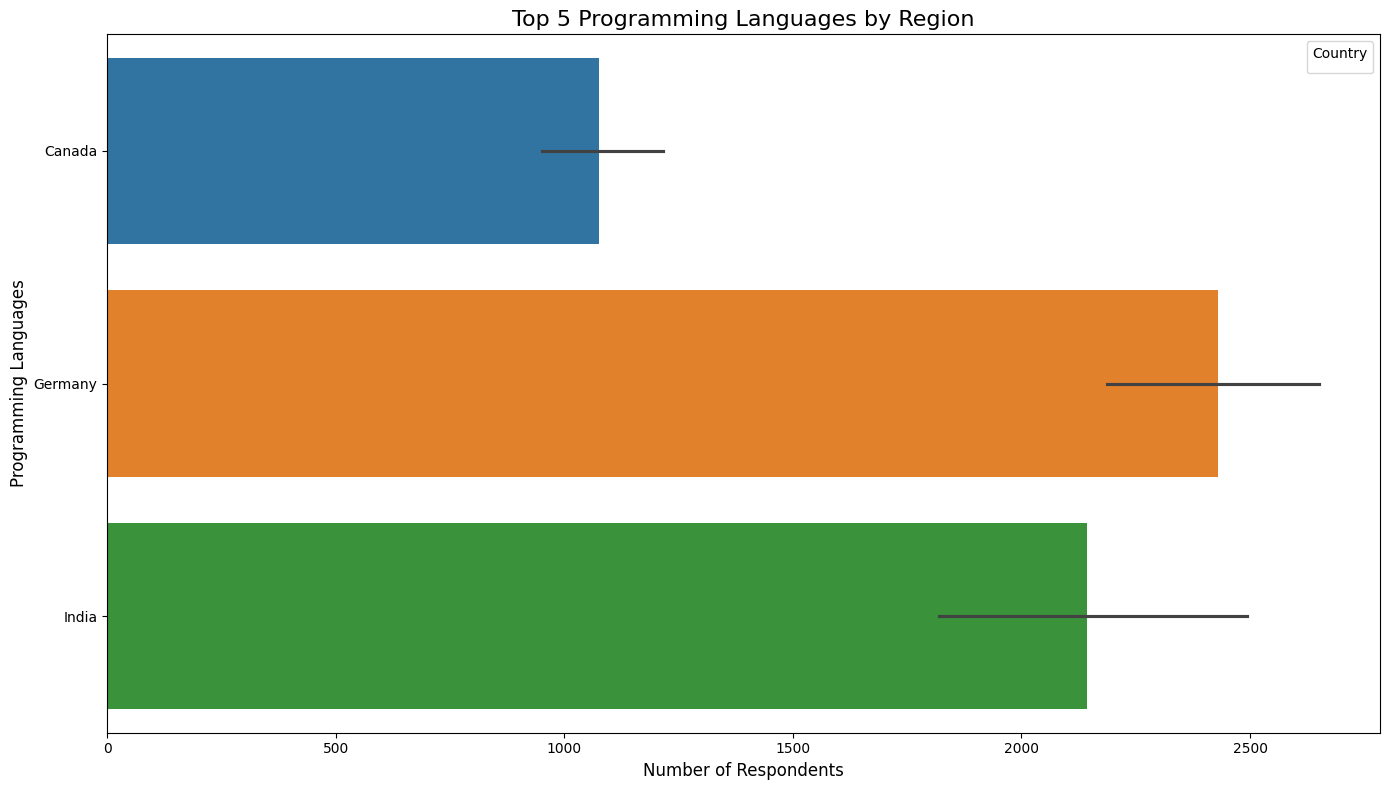

KeyError: "['United States', 'United Kingdom'] not in index"

<Figure size 1400x1000 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define regions of interest (add/modify as needed)
regions = ['United States', 'India', 'Germany', 'Canada', 'United Kingdom']

# Filter data by region (with error handling)
try:
    df_filtered = df[df['Country'].isin(regions)]
except KeyError:
    print("Error: 'Country' column not found.")
    exit()

# Data Cleaning and Preparation (handle missing 'LanguageHaveWorkedWith')
try:
    df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';').fillna('')
    df_exploded = df_filtered.explode('Languages')
    df_exploded['Languages'] = df_exploded['Languages'].str.strip()  # Remove leading/trailing spaces
    df_exploded = df_exploded[df_exploded['Languages'] != '']  # Remove empty strings
except KeyError:
    print("Error: 'LanguageHaveWorkedWith' column not found.")
    exit()

# Group, Count, and Get Top Languages
top_languages_by_region = df_exploded.groupby(['Country', 'Languages']).size().groupby('Country').nlargest(5)  # Top 5

# --- Visualization with Bar Plot (Recommended for this case) ---
plt.figure(figsize=(14, 8))
sns.barplot(x=top_languages_by_region.values, y=top_languages_by_region.index.get_level_values(1), hue=top_languages_by_region.index.get_level_values(0))
plt.title('Top 5 Programming Languages by Region', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Programming Languages', fontsize=12)
plt.legend(title='Country')
plt.tight_layout()
plt.show()



# --- Visualization with Heatmap (Alternative if many languages/regions) ---
# (Use if you have a large number of languages and regions for a more compact view)
language_counts = df_exploded.groupby(['Country', 'Languages']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(language_counts.loc[regions], annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Respondents'})  # Use .loc for region order
plt.title('Popularity of Programming Languages by Region', fontsize=16)
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Prevent country labels from rotating
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


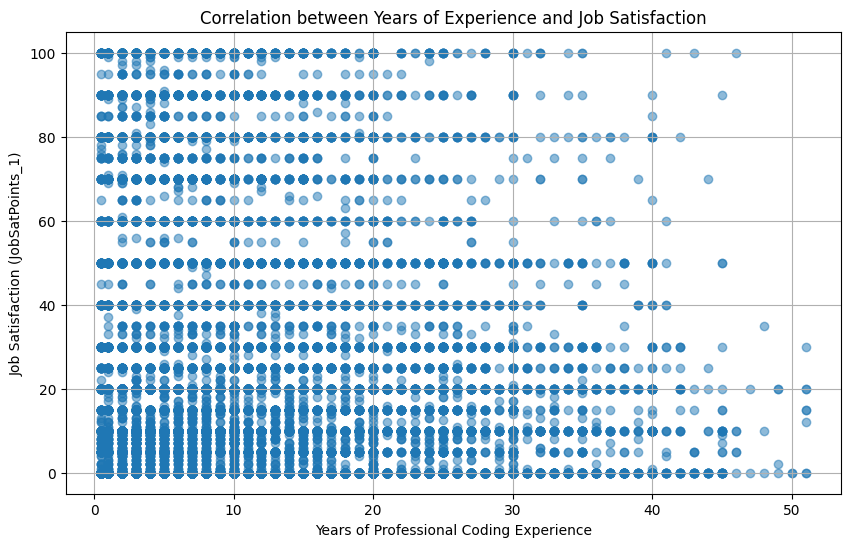

In [10]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to convert YearsCodePro to numeric values
def convert_years_code_pro(years):
    if years == 'Less than 1 year':
        return 0.5
    elif years == 'More than 50 years':
        return 51
    else:
        try:
            return float(years)
        except ValueError:
            return None

# Apply the conversion function to the YearsCodePro column
df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years_code_pro)

# Create a scatter plot to visualize the relationship between YearsCodePro and JobSatPoints_1
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCodeProNumeric'], df['JobSatPoints_1'], alpha=0.5)
plt.title('Correlation between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of Educational Background and Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                   

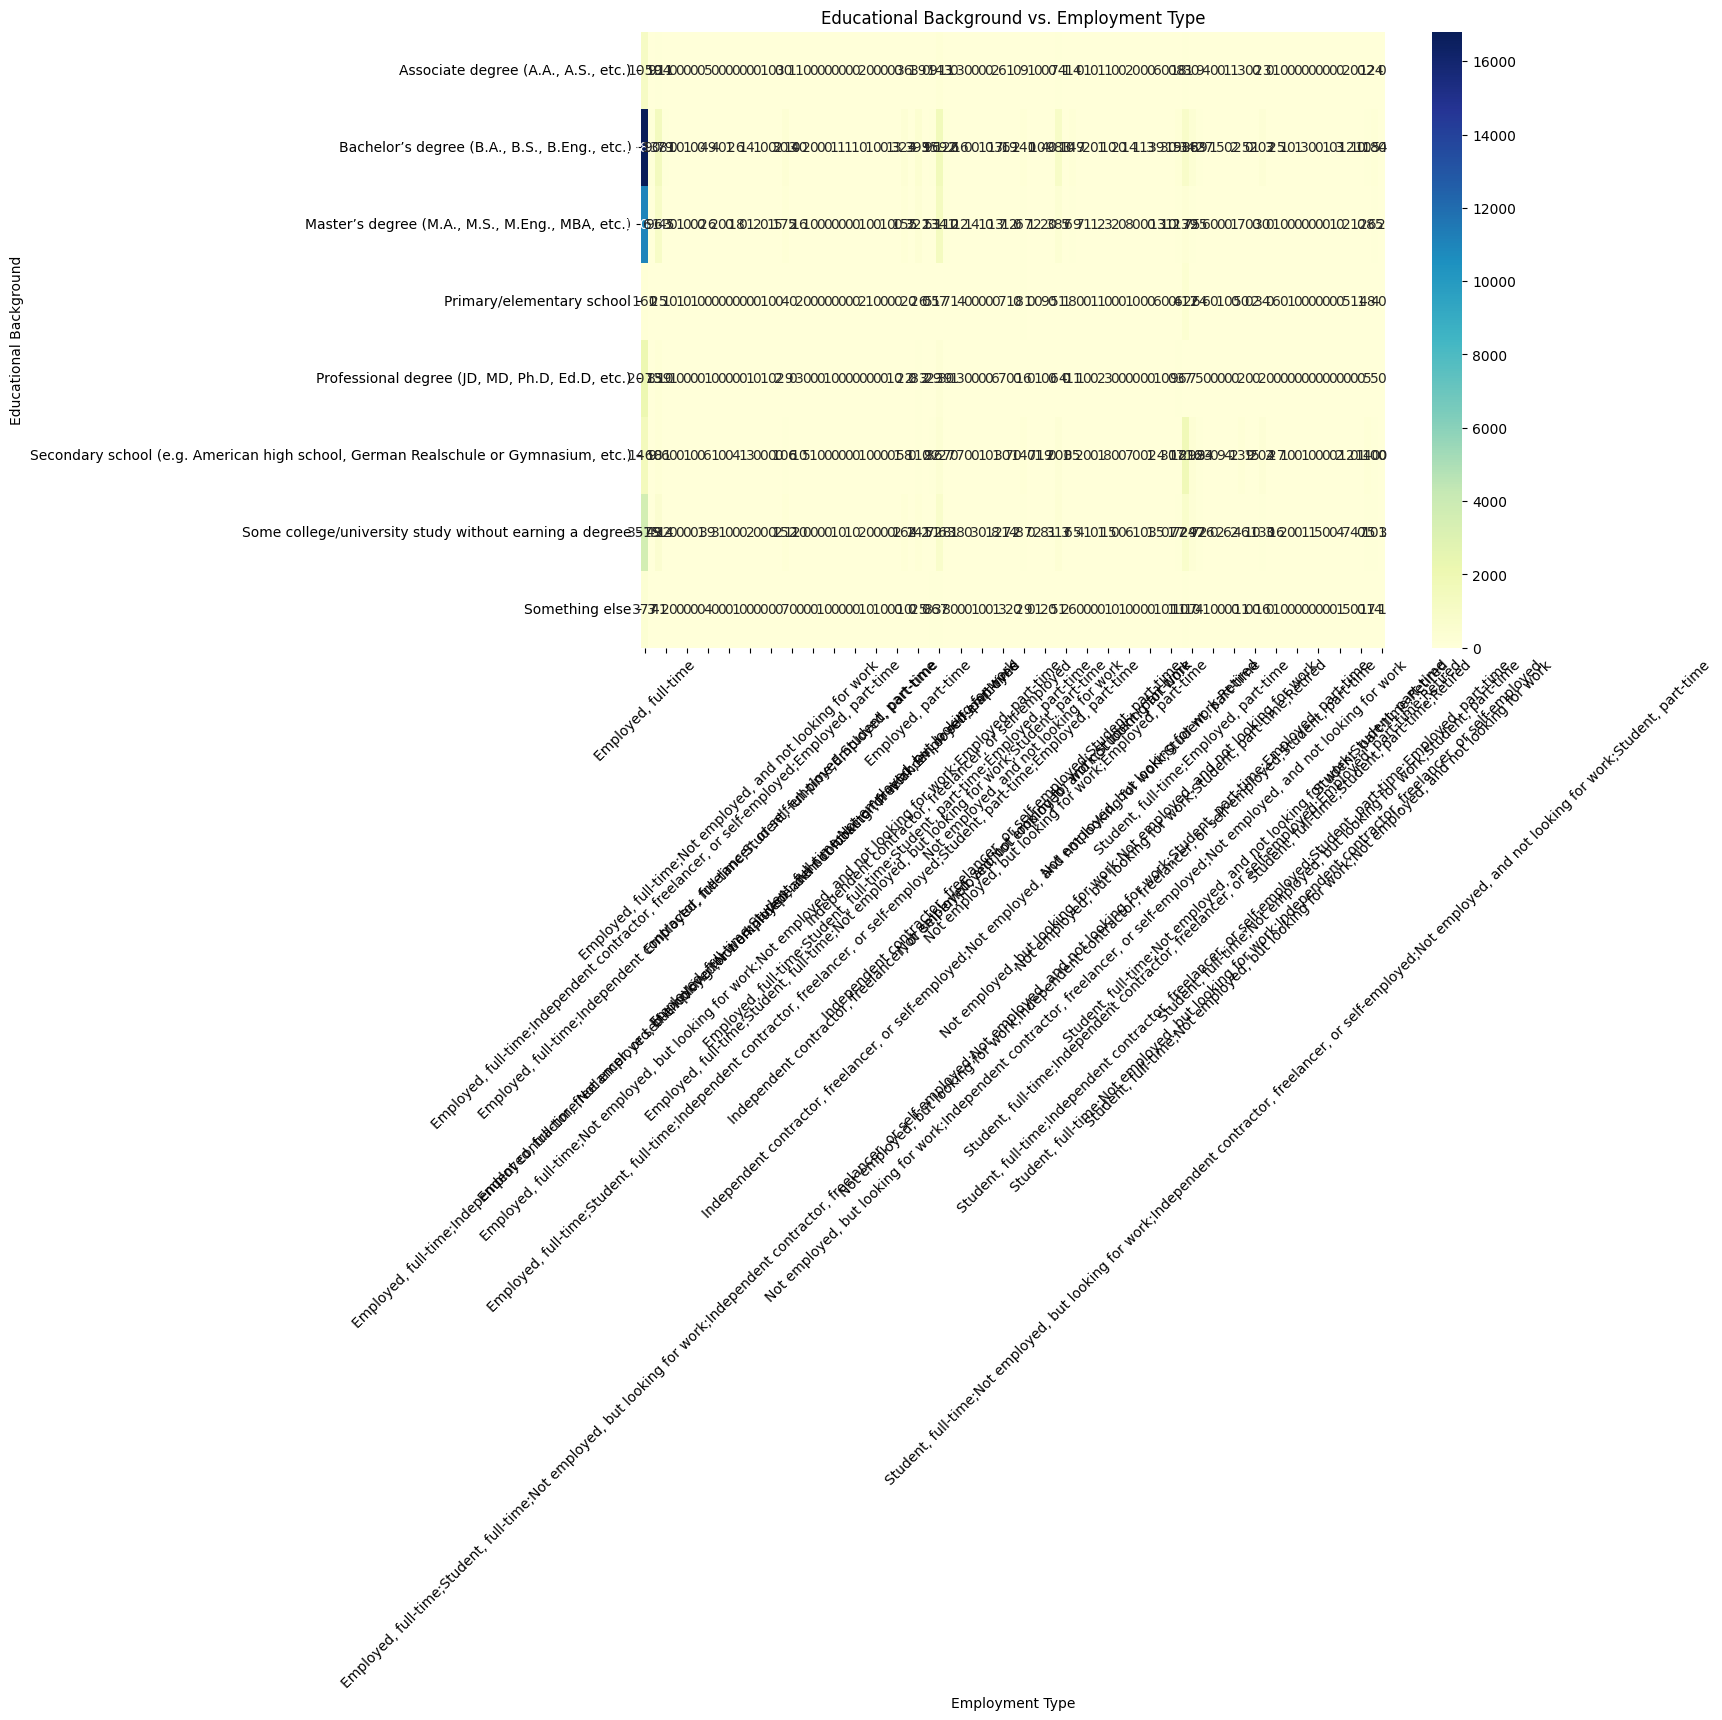

In [11]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulate educational background and employment type
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the cross-tabulation
print("Cross-tabulation of Educational Background and Employment Type:")
print(education_employment_crosstab)

# Visualize the cross-tabulation using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(education_employment_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Educational Background vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Educational Background')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_2211/1837152153.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


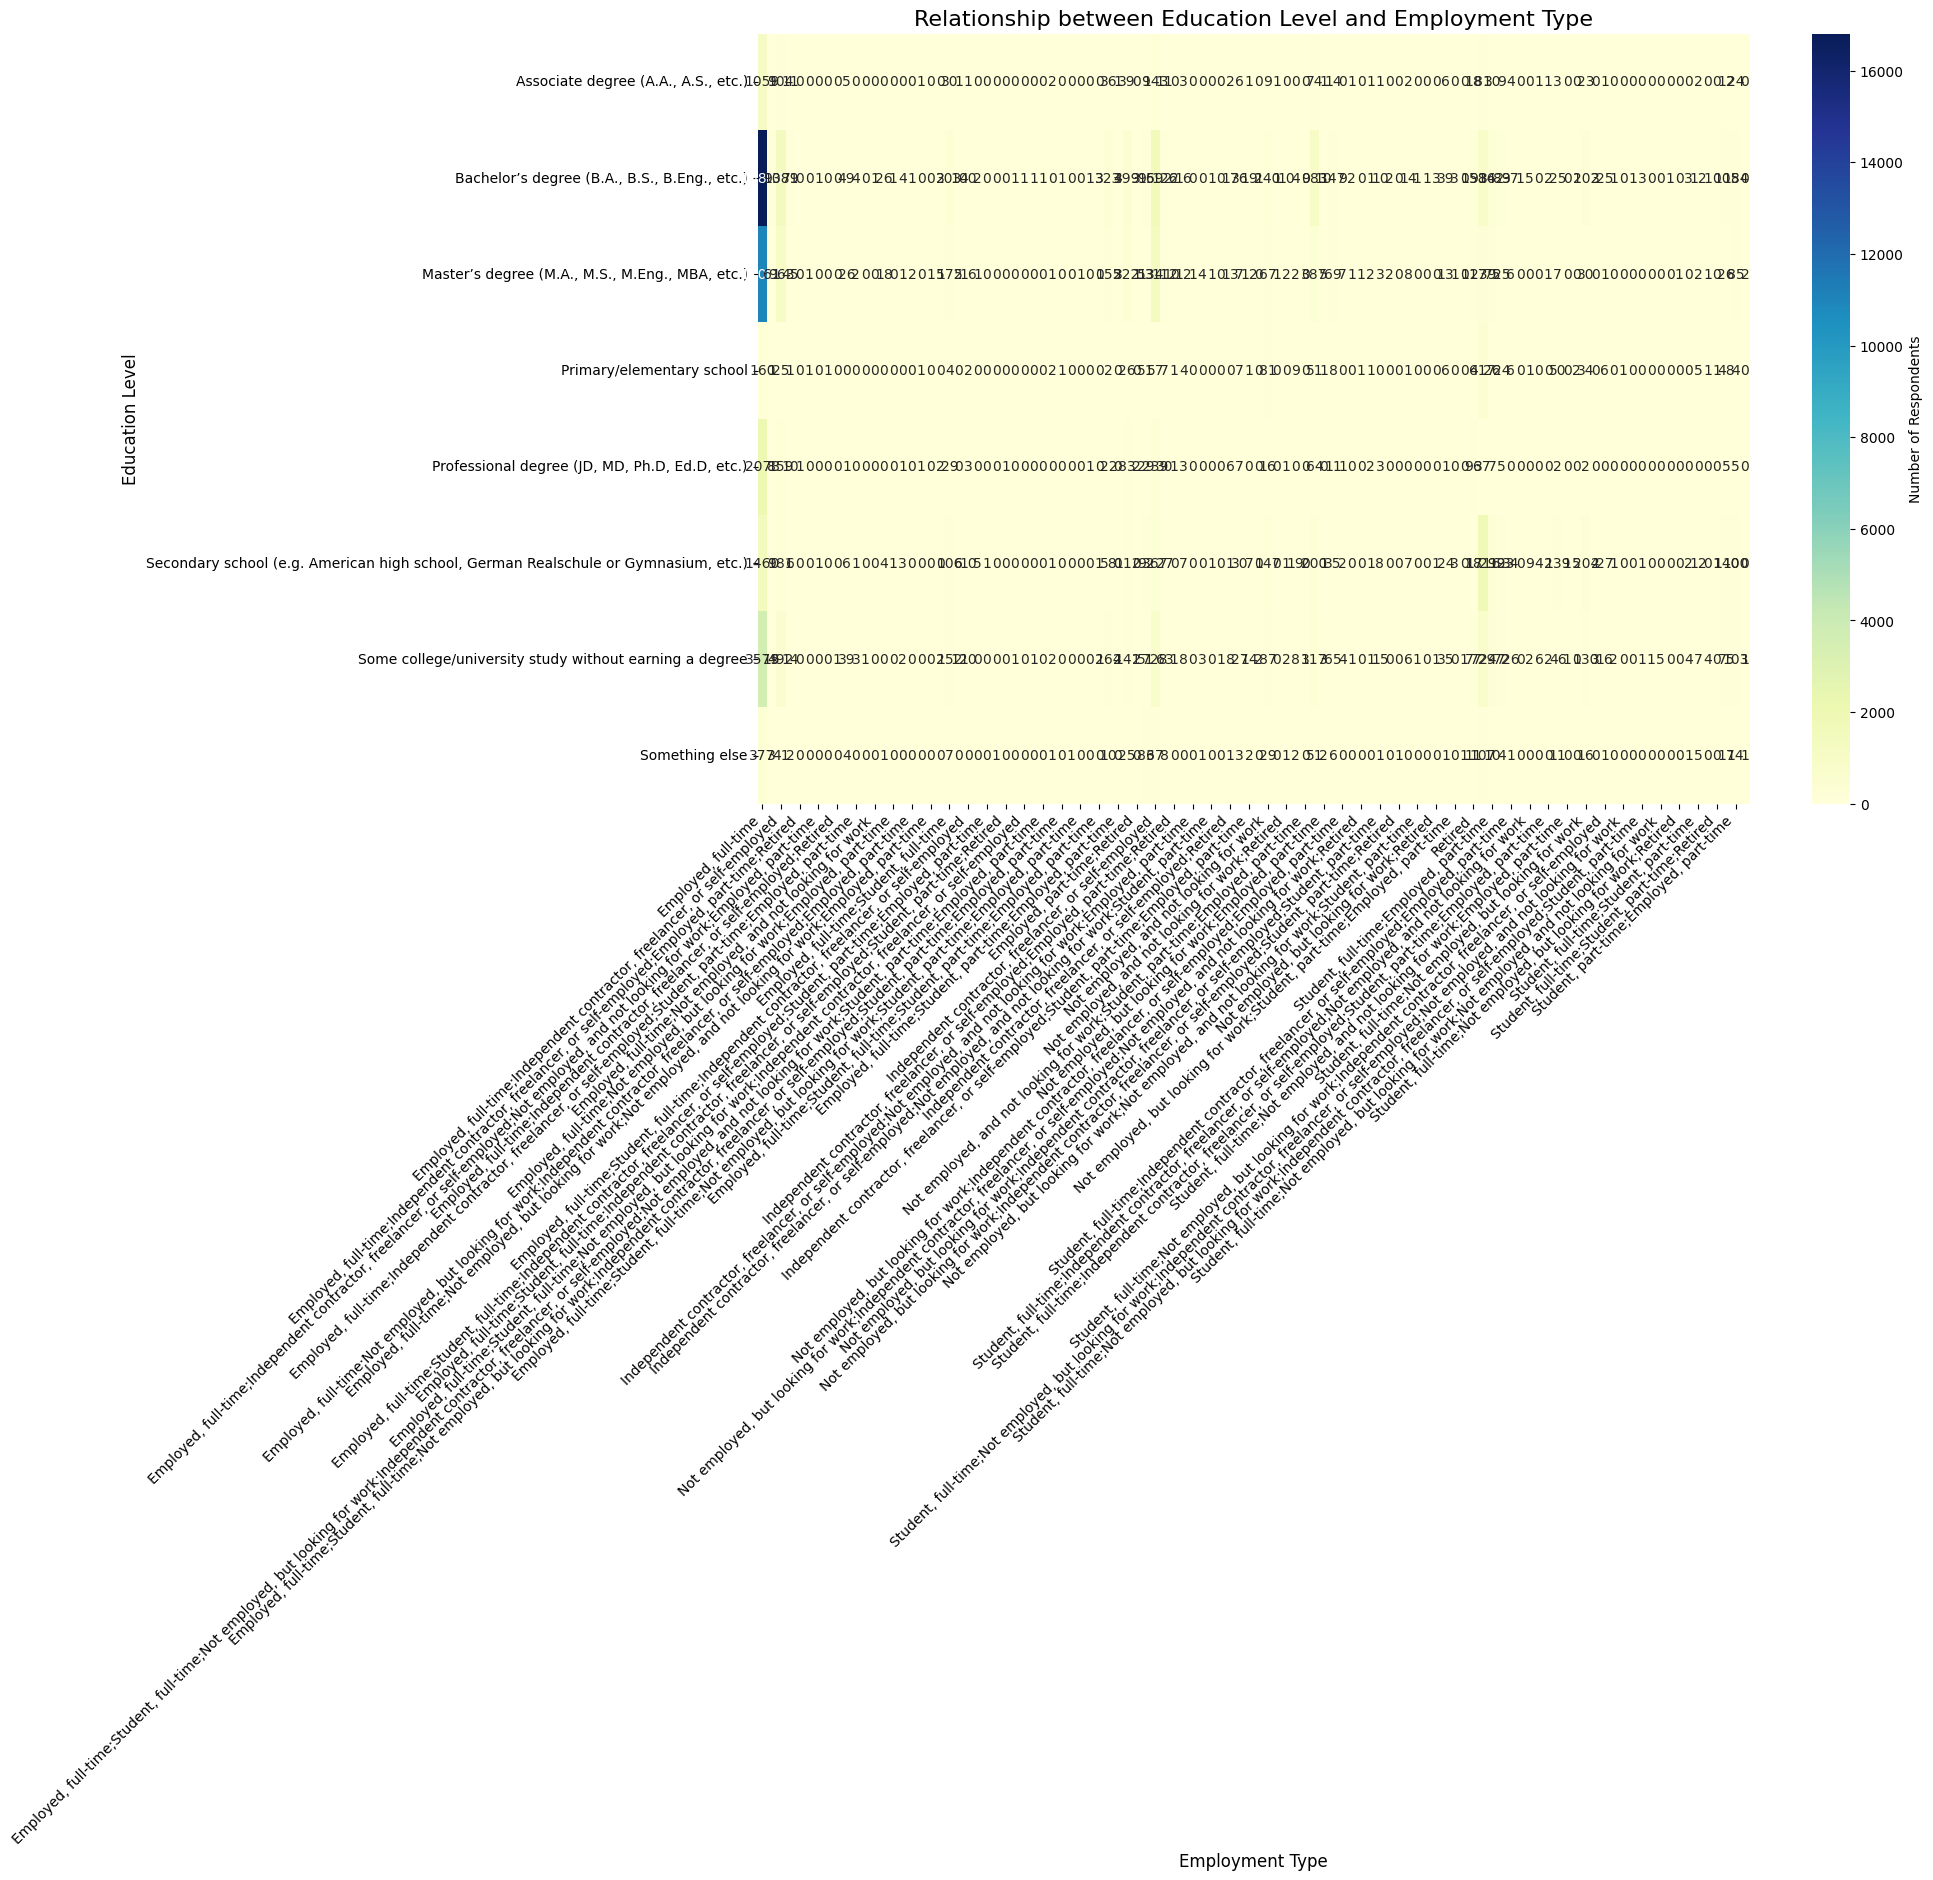

/tmp/ipykernel_2211/1837152153.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

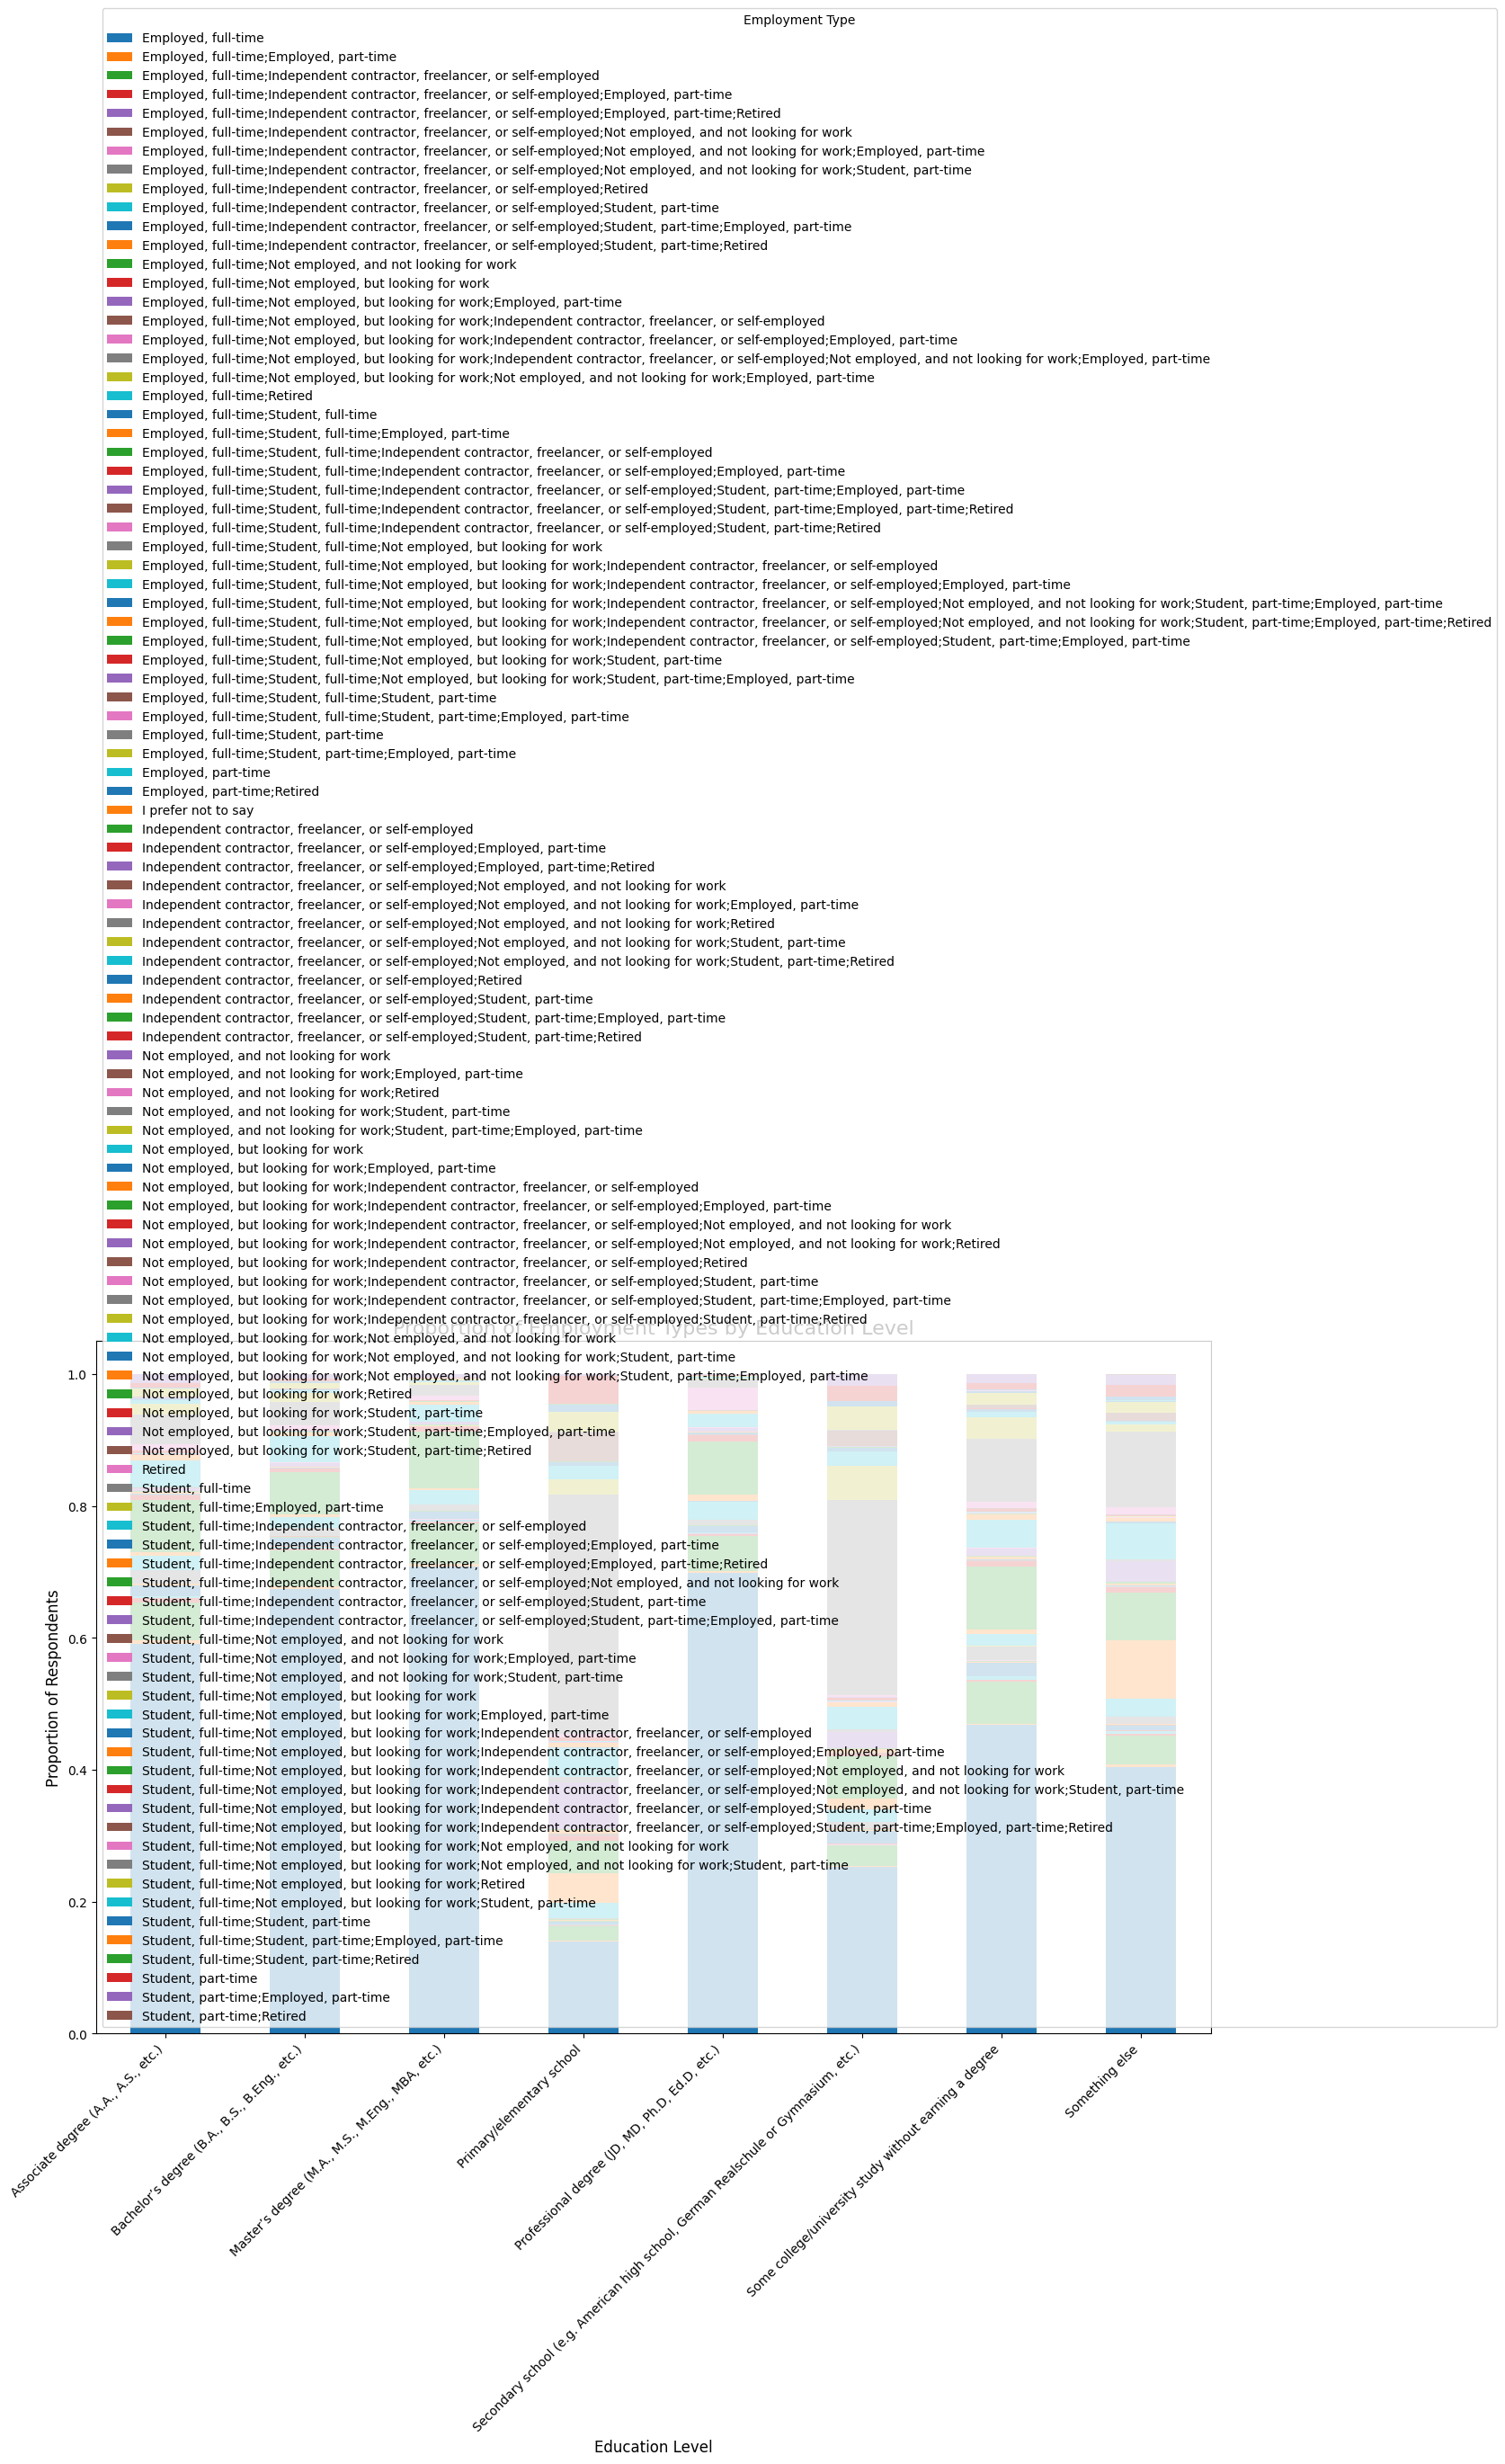


Chi-squared test results:
Chi-squared statistic: 17268.03951160201
P-value: 0.0


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Preparation (handle missing values if needed)
# It's important to handle missing values in EdLevel and Employment appropriately
# before cross-tabulation.  Here are some examples:

# 1. Drop rows with missing values (if they're few and not crucial):
df_cleaned = df.dropna(subset=['EdLevel', 'Employment'])

# 2. Fill missing values with a placeholder (if appropriate):
# df['EdLevel'].fillna('Unknown', inplace=True)
# df['Employment'].fillna('Unknown', inplace=True)


# Cross-Tabulation
education_employment = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['Employment'])

# --- Visualization with Heatmap (Recommended for cross-tabulation) ---
plt.figure(figsize=(16, 10)) # Adjust figure size as needed
sns.heatmap(education_employment, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Respondents'}) # Integer format, colorbar label
plt.title('Relationship between Education Level and Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate employment type labels
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# --- Alternative Visualization with Stacked Bar Chart ---
#  (Useful for showing proportions within each education level)
education_employment_normalized = education_employment.div(education_employment.sum(axis=1), axis=0) # Normalize for proportions

plt.figure(figsize=(16, 10))
education_employment_normalized.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Proportion of Employment Types by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()


# --- Statistical Analysis (Optional) ---
# You can perform a Chi-squared test to check for statistical significance
# of the relationship between education level and employment type.
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(education_employment)
print("\nChi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
# A small p-value (e.g., < 0.05) suggests a statistically significant relationship.

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [14]:
import pandas as pd

# Perform your data analysis and modifications here
# For example, let's assume you have added a new column 'ExperienceLevel'
# df['ExperienceLevel'] = ...

# Save the modified dataset to a new CSV file
output_file_path = r'C:\Users\Administrator\Desktop\Python for Data Science\modified_survey_data.csv'  # Replace with your desired file path
df.to_csv(output_file_path, index=False)

print(f"Modified dataset saved to {output_file_path}")


Modified dataset saved to C:\Users\Administrator\Desktop\Python for Data Science\modified_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
